<a href="https://colab.research.google.com/github/ishnt/Data_science_stuff/blob/main/Diabetes_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [246]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix,accuracy_score,classification_report


In [247]:
df=pd.read_csv('/content/diabetes.csv')

In [248]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [249]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [250]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [251]:
df['Pregnancies']=df['Pregnancies'].replace(0,np.mean(df['Pregnancies']))
df['Glucose']=df['Glucose'].replace(0,np.mean(df['Glucose']))
df['BloodPressure']=df['BloodPressure'].replace(0,np.mean(df['BloodPressure']))
df['Insulin']=df['Insulin'].replace(0,np.mean(df['Insulin']))
df['BMI']=df['BMI'].replace(0,np.mean(df['BMI']))
df['SkinThickness']=df['SkinThickness'].replace(0,np.mean(df['SkinThickness']))

In [252]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,4.400782,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,2.984162,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,1.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,2.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.845052,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [253]:
x=df.drop('Outcome',axis=1)
y=df['Outcome']

In [254]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.000000,148.0,72.0,35.000000,79.799479,33.6,0.627,50
1,1.000000,85.0,66.0,29.000000,79.799479,26.6,0.351,31
2,8.000000,183.0,64.0,20.536458,79.799479,23.3,0.672,32
3,1.000000,89.0,66.0,23.000000,94.000000,28.1,0.167,21
4,3.845052,137.0,40.0,35.000000,168.000000,43.1,2.288,33


In [255]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

<Axes: >

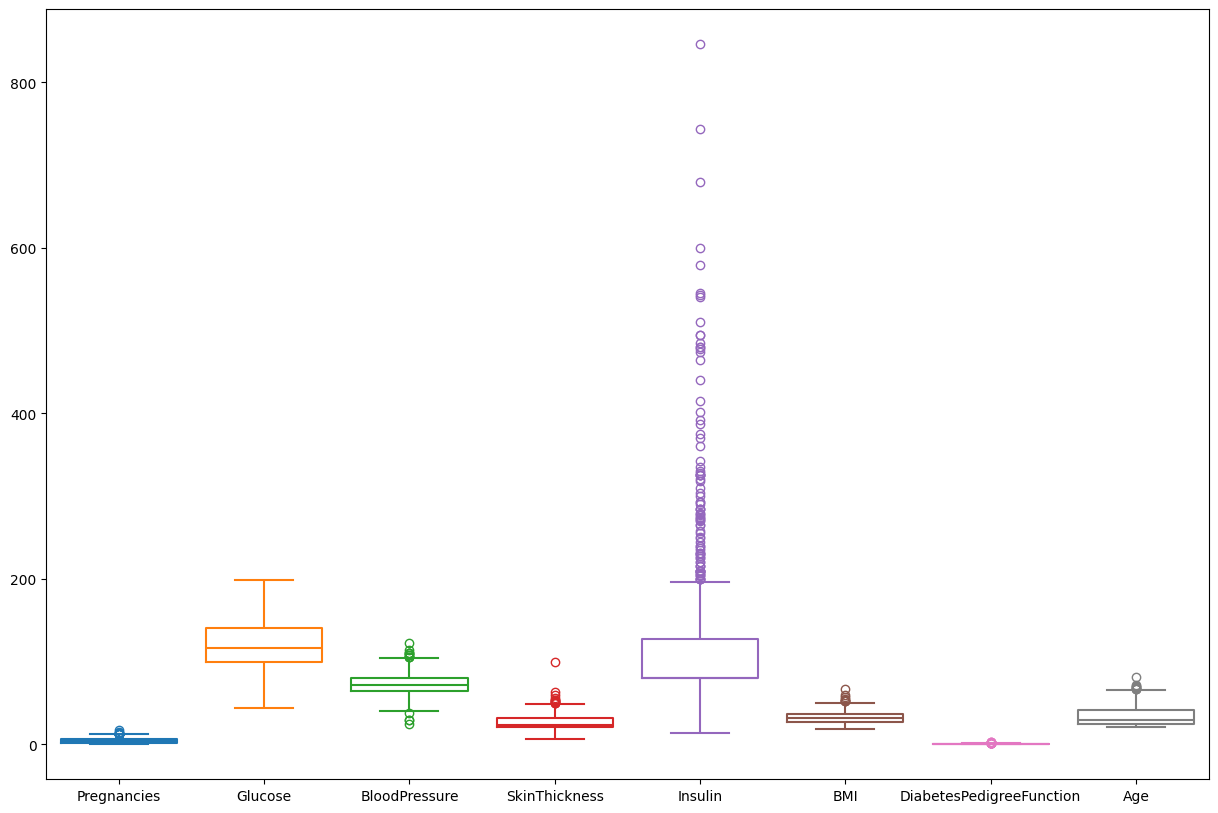

In [256]:
#boxplot
fig,ax=plt.subplots(figsize=(15,10))
sns.boxplot(data=x ,fill=False,ax=ax)

In [257]:
#handling outliers for insulin
IQR=127.250000-79.799479
lower_fence=79.799479-(IQR*1.5)
higher_fence=127.250000+(IQR*1.5)
median=np.median(x['Insulin'])
print(lower_fence)
print(higher_fence)
x[x['Insulin']<lower_fence]=median
x[x['Insulin']>higher_fence]=median

8.623697500000006
198.4257815


<Axes: >

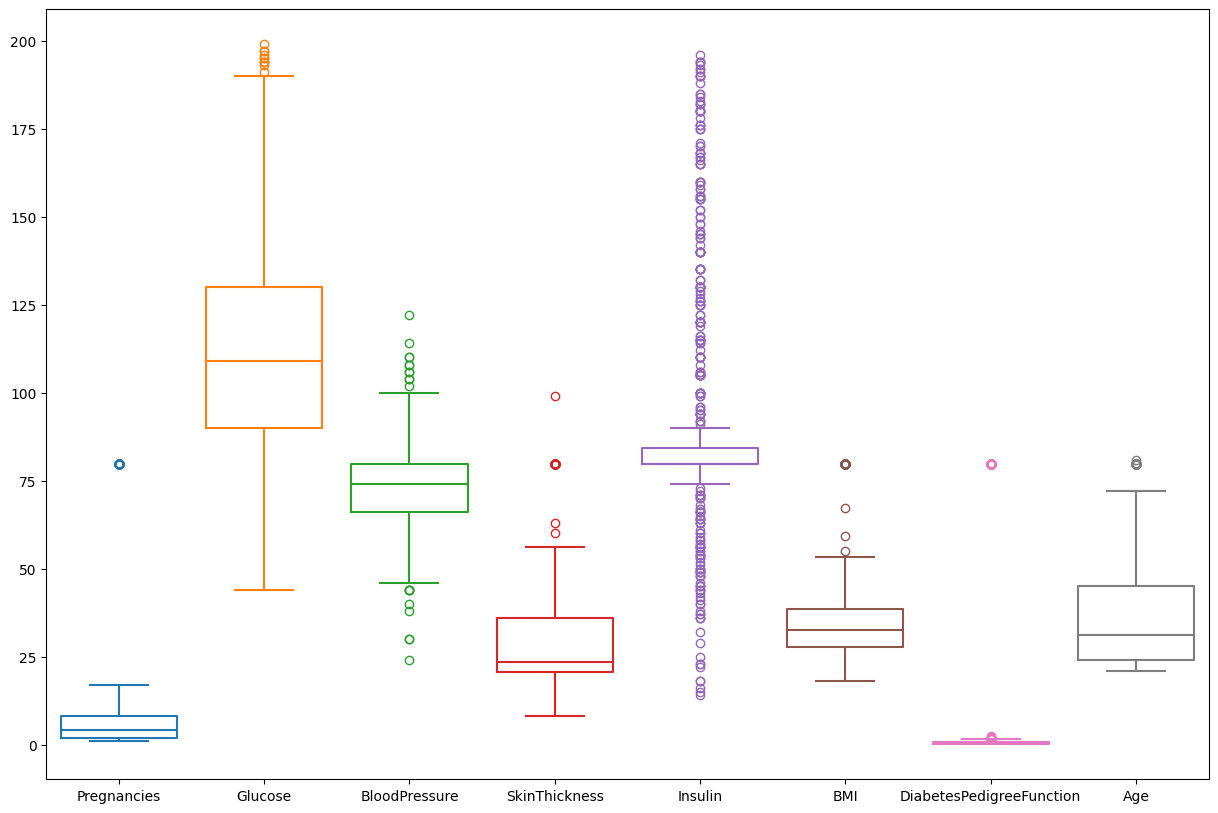

In [258]:
fig,ax=plt.subplots(figsize=(15,10))
sns.boxplot(data=x ,fill=False,ax=ax)

In [259]:
x.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,13.146196,113.673993,72.903444,32.066315,90.148644,37.505432,9.651308,38.588742
std,24.312632,29.872484,11.667125,19.358979,32.086452,16.582018,25.414966,18.578081
min,1.000000,44.000000,24.000000,8.000000,14.000000,18.200000,0.078000,21.000000
25%,2.000000,90.000000,66.000000,20.536458,79.799479,27.700000,0.251750,24.000000
50%,4.000000,109.000000,74.000000,23.500000,79.799479,32.650000,0.411500,31.000000
75%,8.000000,130.000000,79.799479,36.000000,84.250000,38.500000,0.732250,45.000000
max,79.799479,199.000000,122.000000,99.000000,196.000000,79.799479,79.799479,81.000000


In [260]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [261]:
x_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
60,2.000000,84.000000,69.105469,20.536458,79.799479,31.992578,0.304000,21.000000
618,9.000000,112.000000,82.000000,24.000000,79.799479,28.200000,1.282000,50.000000
346,1.000000,139.000000,46.000000,19.000000,83.000000,28.700000,0.654000,22.000000
294,3.845052,161.000000,50.000000,20.536458,79.799479,21.900000,0.254000,65.000000
231,79.799479,79.799479,79.799479,79.799479,79.799479,79.799479,79.799479,79.799479
...,...,...,...,...,...,...,...,...
71,5.000000,139.000000,64.000000,35.000000,140.000000,28.600000,0.411000,26.000000
106,1.000000,96.000000,122.000000,20.536458,79.799479,22.400000,0.207000,27.000000
270,10.000000,101.000000,86.000000,37.000000,79.799479,45.600000,1.136000,38.000000
435,3.845052,141.000000,69.105469,20.536458,79.799479,42.400000,0.205000,29.000000


In [262]:
y_train

60     0
618    1
346    0
294    0
231    1
      ..
71     0
106    0
270    1
435    1
102    0
Name: Outcome, Length: 614, dtype: int64

<Axes: >

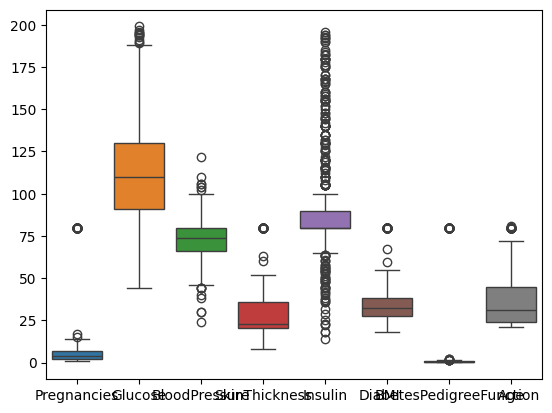

In [263]:
sns.boxplot(x_train)

In [264]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)


<Axes: >

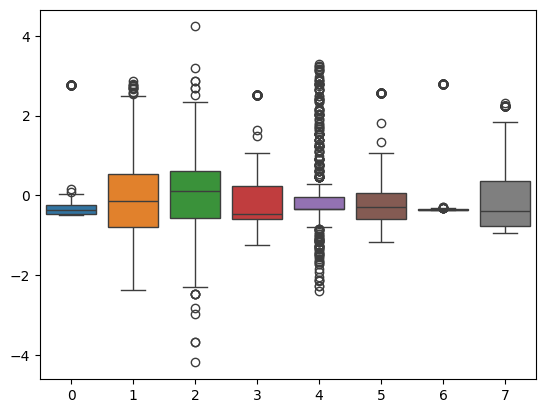

In [265]:
sns.boxplot(x_train_scaled)

In [266]:
x_train_scaled

array([[-0.45279118, -1.01476345, -0.3088889 , ..., -0.31964815,
        -0.36475423, -0.93632804],
       [-0.16292271, -0.06844392,  0.79832679, ..., -0.54904707,
        -0.32597307,  0.63697709],
       [-0.49420096,  0.84407848, -2.29288794, ..., -0.51880394,
        -0.35087549, -0.88207614],
       ...,
       [-0.12151293, -0.44021231,  1.14179509, ...,  0.5034141 ,
        -0.33176249, -0.01404572],
       [-0.37638798,  0.91167273, -0.3088889 , ...,  0.30985802,
        -0.36867993, -0.50231283],
       [-0.37638798,  0.37091871,  2.00046585, ..., -0.89381884,
        -0.36641968, -0.93632804]])

In [267]:
x_test_scaled

array([[-0.28715206, -0.54160369, -1.26248303, ..., -0.19822668,
        -0.35975789,  0.25721378],
       [-0.45279118, -0.06844392,  0.19725726, ..., -0.09540002,
        -0.37094019, -0.93632804],
       [-0.45279118, -0.20363243, -0.74728057, ..., -0.39178276,
        -0.37054365, -0.93632804],
       ...,
       [-0.20433249, -0.64299507, -0.06034397, ..., -0.02886511,
        -0.35757694,  1.0167404 ],
       [ 2.76886822, -1.15672898,  0.6093745 , ...,  2.57201319,
         2.78752304,  2.25365549],
       [-0.20433249, -1.35273471, -0.23207812, ..., -0.11959452,
        -0.34885316,  0.04020618]])

In [268]:
#hyperparamter tuning
#GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
regressor=LogisticRegression()
parameter={'penalty':['l1', 'l2', 'elasticnet'],
            'C':np.logspace(-3,3,7),
            'solver':['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
           }
cfg=GridSearchCV(regressor, param_grid=parameter,scoring='accuracy',cv=5)

In [269]:
cfg.fit(x_train_scaled,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             scoring='accuracy')

In [270]:
cfg.best_params_

{'C': 1.0, 'penalty': 'l1', 'solver': 'liblinear'}

In [271]:
cfg.best_score_

0.7296414767426361

In [272]:
from sklearn.model_selection import RandomizedSearchCV
ctg=RandomizedSearchCV(regressor,n_iter=10,param_distributions=parameter,cv=5)

In [273]:
ctg.fit(x_train_scaled,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solver

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                                        'penalty': ['l1', 'l2', 'elasticnet'],
                                        'solver': ['lbfgs', 'liblinear',
                                                   'newton-cg',
                                                   'newton-cholesky', 'sag',
                                                   'saga']})

In [274]:
ctg.best_params_

{'solver': 'liblinear', 'penalty': 'l1', 'C': 100.0}

In [275]:
ctg.best_score_

0.7264027722244435

In [276]:
regressor1=LogisticRegression(solver= 'liblinear', penalty= 'l1', C= 10.0)

In [277]:
regressor1.fit(x_train_scaled,y_train)

LogisticRegression(C=10.0, penalty='l1', solver='liblinear')

In [281]:
y_pred=regressor1.predict(x_test_scaled)

In [282]:
[y_test]

[668    0
 324    0
 624    0
 690    0
 473    0
       ..
 355    1
 534    0
 344    0
 296    1
 462    0
 Name: Outcome, Length: 154, dtype: int64]

In [283]:
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[84 15]
 [30 25]]
0.7077922077922078
              precision    recall  f1-score   support

           0       0.74      0.85      0.79        99
           1       0.62      0.45      0.53        55

    accuracy                           0.71       154
   macro avg       0.68      0.65      0.66       154
weighted avg       0.70      0.71      0.70       154

